In [68]:
import os
import math
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define the path to your dataset
data_dir = r'C:\Kuliah Tel U\KP\Data\Sunda'

# Define image size and batch size
img_height, img_width = 100, 100
batch_size = 16

# Use ImageDataGenerator for data loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("Class Indices:", train_generator.class_indices)

Found 8640 images belonging to 108 classes.
Found 2160 images belonging to 108 classes.
Class Indices: {'de': 0, 'deu': 1, 'di': 2, 'do': 3, 'du': 4, 'dé': 5, 'fe': 6, 'feu': 7, 'fi': 8, 'fo': 9, 'fu': 10, 'fé': 11, 'ge': 12, 'geu': 13, 'gi': 14, 'go': 15, 'gu': 16, 'gé': 17, 'he': 18, 'heu': 19, 'hi': 20, 'ho': 21, 'hu': 22, 'hé': 23, 'ke': 24, 'keu': 25, 'ki': 26, 'ko': 27, 'ku': 28, 'ké': 29, 'le': 30, 'leu': 31, 'li': 32, 'lo': 33, 'lu': 34, 'lé': 35, 'me': 36, 'meu': 37, 'mi': 38, 'mo': 39, 'mu': 40, 'mé': 41, 'ne': 42, 'neu': 43, 'nge': 44, 'ngeu': 45, 'ngi': 46, 'ngo': 47, 'ngu': 48, 'ngé': 49, 'ni': 50, 'no': 51, 'nu': 52, 'né': 53, 'pe': 54, 'peu': 55, 'pi': 56, 'po': 57, 'pu': 58, 'pé': 59, 'qe': 60, 'qeu': 61, 'qi': 62, 'qo': 63, 'qu': 64, 'qé': 65, 're': 66, 'reu': 67, 'ri': 68, 'ro': 69, 'ru': 70, 'ré': 71, 'se': 72, 'seu': 73, 'si': 74, 'so': 75, 'su': 76, 'sé': 77, 'te': 78, 'teu': 79, 'ti': 80, 'to': 81, 'tu': 82, 'té': 83, 've': 84, 'veu': 85, 'vi': 86, 'vo': 87, 'vu':

In [69]:
model = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), 

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten the output to feed into Dense layers
    Flatten(),

    # Fully Connected Layers
    Dense(1024, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_104 (Conv2D)             │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 98, 98, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 44, 44, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 20, 20, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 1024)           │         4,09

 Total params: 7,478,444 (28.53 MB)

 Trainable params: 7,472,940 (28.51 MB)

 Non-trainable params: 5,504 (21.50 KB)

In [70]:
history = model.fit(
    train_generator,
    steps_per_epoch=270,
    validation_data=validation_generator,
    validation_steps=67,
    epochs=51 
)

model.save('aksara_sunda_classifier.keras')

Epoch 1/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 145s 511ms/step - accuracy: 0.0207 - loss: 5.4961 - val_accuracy: 0.0112 - val_loss: 6.1783
Epoch 2/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 138s 511ms/step - accuracy: 0.0615 - loss: 4.3951 - val_accuracy: 0.0466 - val_loss: 4.6871
Epoch 3/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 3.8644
Epoch 4/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 138s 511ms/step - accuracy: 0.0911 - loss: 3.8033 - val_accuracy: 0.0187 - val_loss: 5.1097
Epoch 5/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 140s 519ms/step - accuracy: 0.1473 - loss: 3.2832 - val_accuracy: 0.2071 - val_loss: 2.6840
Epoch 6/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.7838
Epoch 7/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 138s 512ms/step - accuracy: 0.1975 - loss: 2.8543 - val_accuracy: 0.2528 - val_loss: 2.5878
Epoch 8/51
270/270 ━━━━━━━━━━━━━━━━━━━━ 138s 512ms/step - accura

In [71]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size
print(steps_per_epoch)
print(validation_steps)

540
135


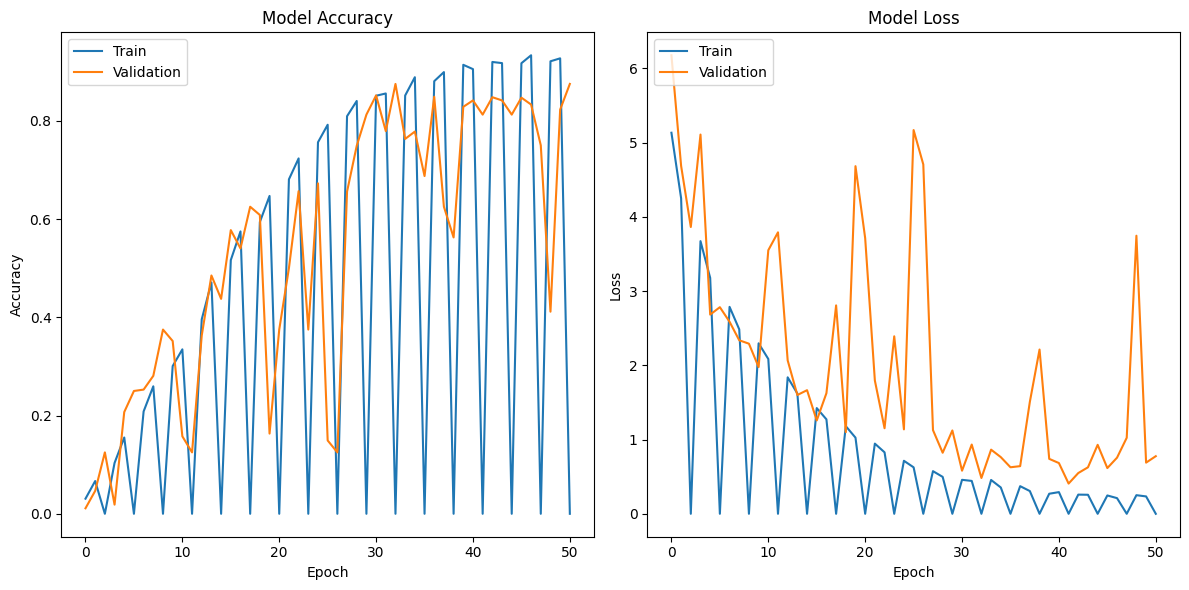

In [72]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [73]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

135/135 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.8393 - loss: 0.6054
Validation Loss: 0.5975
Validation Accuracy: 0.8403


In [74]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a sample image for prediction
sample_image_path = r'C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg'

img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index[0]]

print(f'Predicted Class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Predicted Class: hi


In [75]:
# Save class indices
class_indices = train_generator.class_indices

# Save to a file
import json

with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)


In [76]:
# Load class indices from file
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

class_labels = {v: k for k, v in class_indices.items()}


In [77]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model_path = 'D:\\Random_Projects\\Aksara_classification\\aksara_sunda_classifier.keras'
model = load_model(model_path)

# Load class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

class_labels = {v: k for k, v in class_indices.items()}

# Define image dimensions
img_height, img_width = 100, 100

# List of image paths
sample_image_paths = [
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image2.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image3.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image4.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image5.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image6.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image7.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image8.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image9.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image10.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image11.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image12.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image13.jpg',
]

# Preprocess images and make predictions
for img_path in sample_image_paths:
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_labels.get(predicted_class_index[0], "Unknown")

    print(f'Image: {img_path} - Predicted Class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg - Predicted Class: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image2.jpg - Predicted Class: he
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image3.jpg - Predicted Class: hé
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image4.jpg - Predicted Class: he
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image5.jpg - Predicted Class: hé
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image6.jpg - Predicted Class: heu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image7.jpg - Predicted Class: heu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image8.jpg - Predicted Class: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\

In [ ]:
#CROSS VALIDATION

# import os
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# # Define the path to your dataset
# data_dir = r'C:\Kuliah Tel U\KP\Data\Sunda'

# # Get image paths and labels
# def get_image_paths_labels(data_dir):
#     class_names = sorted(os.listdir(data_dir))
#     image_paths = []
#     labels = []
    
#     for class_index, class_name in enumerate(class_names):
#         class_dir = os.path.join(data_dir, class_name)
#         for filename in os.listdir(class_dir):
#             if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 image_paths.append(os.path.join(class_dir, filename))
#                 labels.append(class_index)
                
#     return np.array(image_paths), np.array(labels), class_names

# image_paths, labels, class_names = get_image_paths_labels(data_dir)

# # Define the number of folds for cross-validation
# num_folds = 5

# # Initialize K-Fold cross-validator
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Initialize lists to keep track of validation metrics
# val_losses = []
# val_accuracies = []

# for fold, (train_indices, val_indices) in enumerate(kf.split(image_paths)):
#     print(f'\nFold {fold+1}/{num_folds}')
    
#     # Split data for this fold
#     train_image_paths, val_image_paths = image_paths[train_indices], image_paths[val_indices]
#     train_labels, val_labels = labels[train_indices], labels[val_indices]
    
#     # Convert labels to class names
#     train_labels_str = convert_labels_to_class_names(train_labels, class_names)
#     val_labels_str = convert_labels_to_class_names(val_labels, class_names)
    
#     # Create DataFrames
#     train_df = pd.DataFrame({'filename': train_image_paths, 'class': train_labels_str})
#     val_df = pd.DataFrame({'filename': val_image_paths, 'class': val_labels_str})
    
#     # Create ImageDataGenerators
#     train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         horizontal_flip=True,
#         vertical_flip=True,
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         brightness_range=[0.8,1.2]
#     )
    
#     val_datagen = ImageDataGenerator(rescale=1./255)
    
#     train_generator = train_datagen.flow_from_dataframe(
#         dataframe=train_df,
#         x_col='filename',
#         y_col='class',
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=True
#     )
    
#     validation_generator = val_datagen.flow_from_dataframe(
#         dataframe=val_df,
#         x_col='filename',
#         y_col='class',
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=False
#     )
    
#     # Define the CNN model
#     model = Sequential([
#         Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#         BatchNormalization(),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(128, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(256, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(256, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(512, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(512, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Flatten(),
#         Dense(1024, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(512, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(len(class_names), activation='softmax')
#     ])
    
#     # Compile the model
#     model.compile(
#         optimizer='adam',
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )
    
#     # Train the model
#     history = model.fit(
#         train_generator,
#         steps_per_epoch=train_generator.samples // batch_size,
#         validation_data=validation_generator,
#         validation_steps=validation_generator.samples // batch_size,
#         epochs=51
#     )
    
#     # Evaluate the model
#     val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
    
#     # Store validation metrics
#     val_losses.append(val_loss)
#     val_accuracies.append(val_accuracy)
    
#     print(f'Validation Loss: {val_loss:.4f}')
#     print(f'Validation Accuracy: {val_accuracy:.4f}')
    
#     # Save the model for this fold (optional)
#     model.save(f'aksara_sunda_classifier_fold_{fold+1}.keras')
    
# # Print average validation metrics
# print(f'\nAverage Validation Loss: {np.mean(val_losses):.4f}')
# print(f'Average Validation Accuracy: {np.mean(val_accuracies):.4f}')
